# Reading File

In [1]:
import pandas as pd
A = pd.read_csv(r'C:\Users\shubham\Anaconda_Files\Jamshedpur\Cross Sell Data.csv')

# Suppressing Warnings

In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [3]:
A.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
A.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

# Check for class imbalance 

In [6]:
import seaborn as sns
sns.countplot(A.y)

In [7]:
B = A.copy()

# Checking Distribution of Data

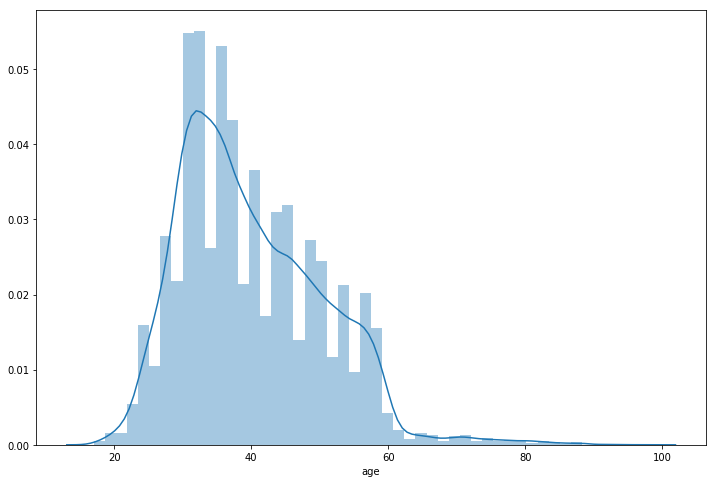

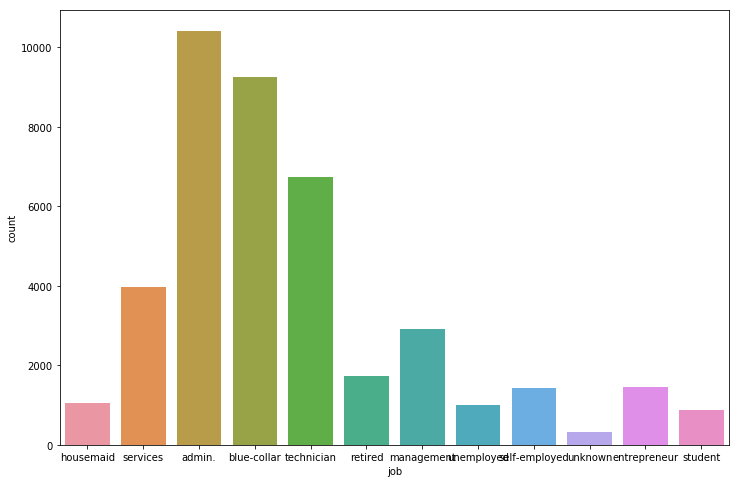

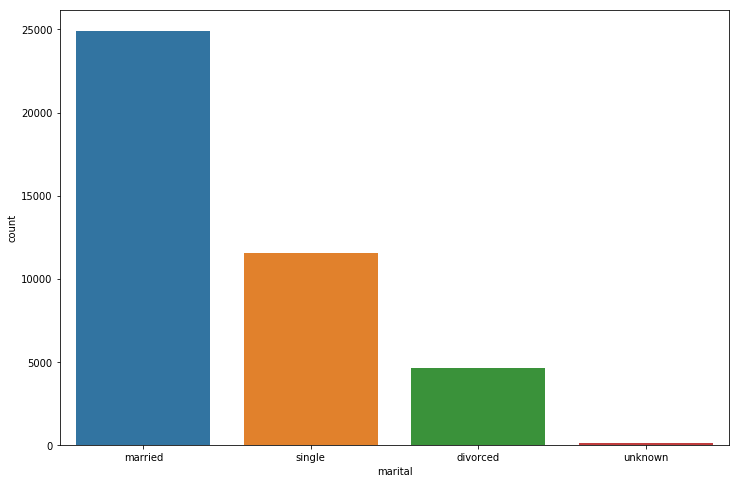

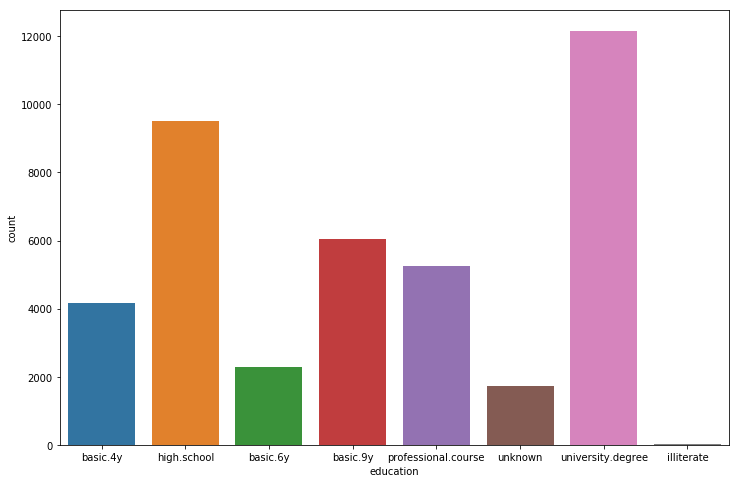

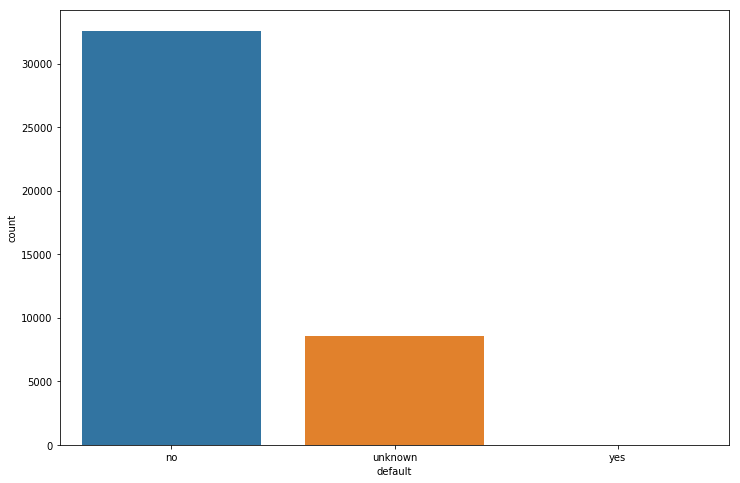

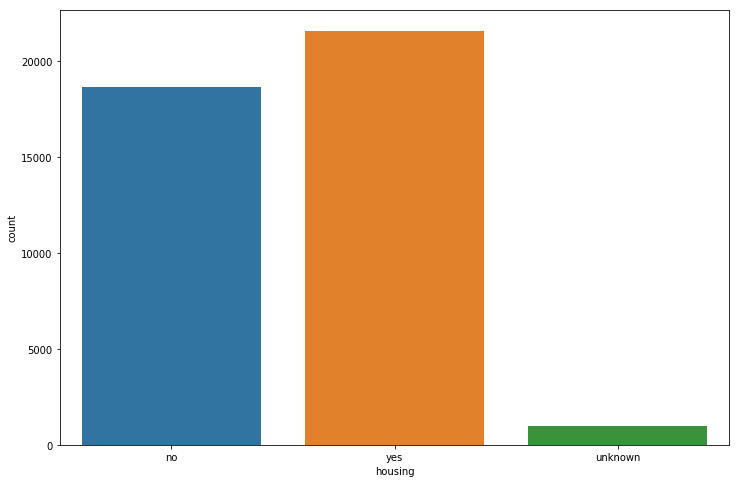

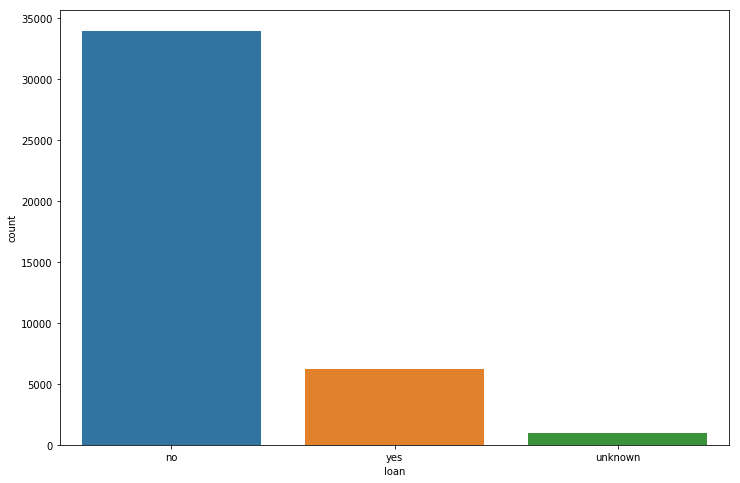

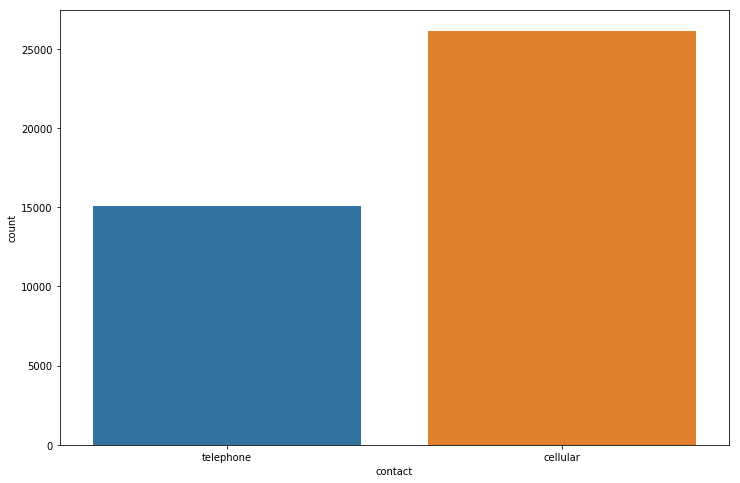

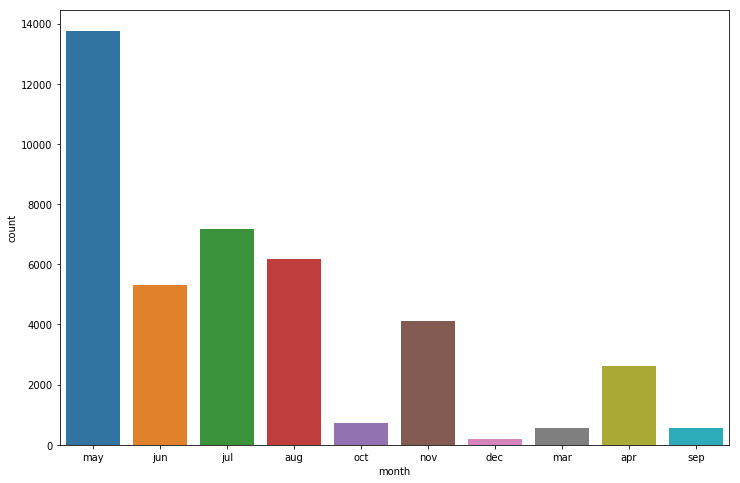

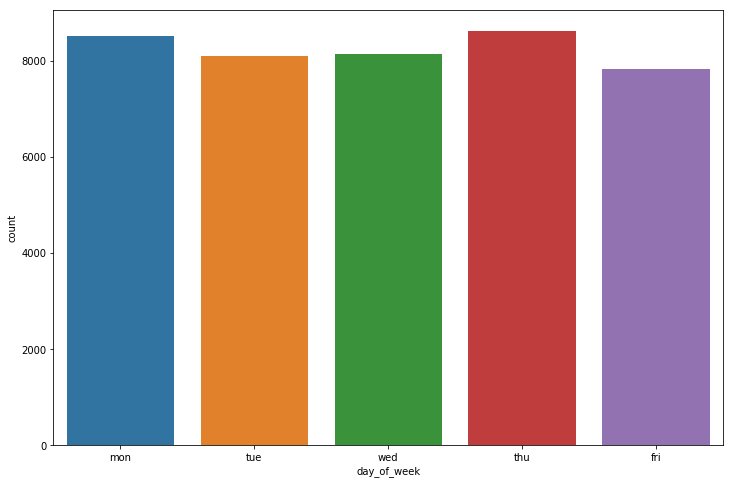

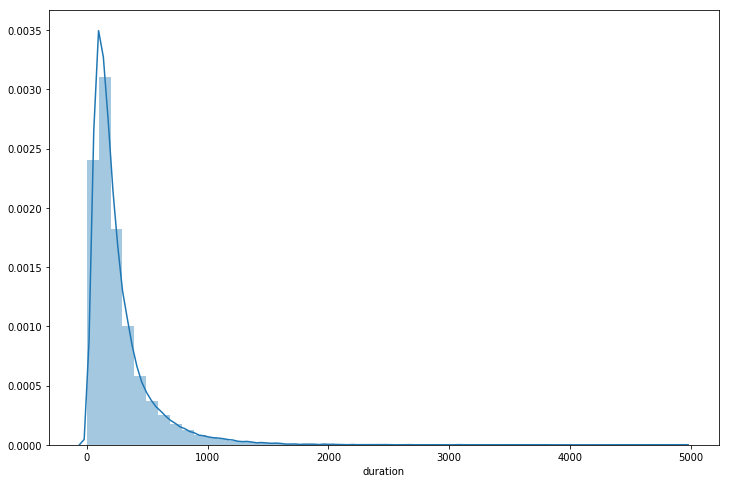

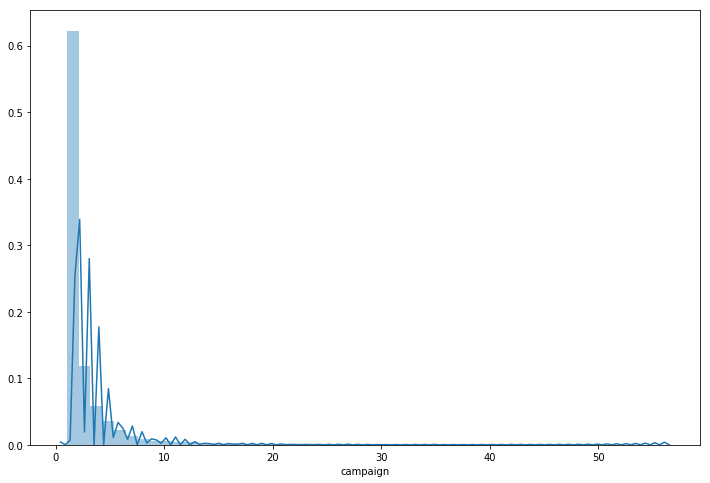

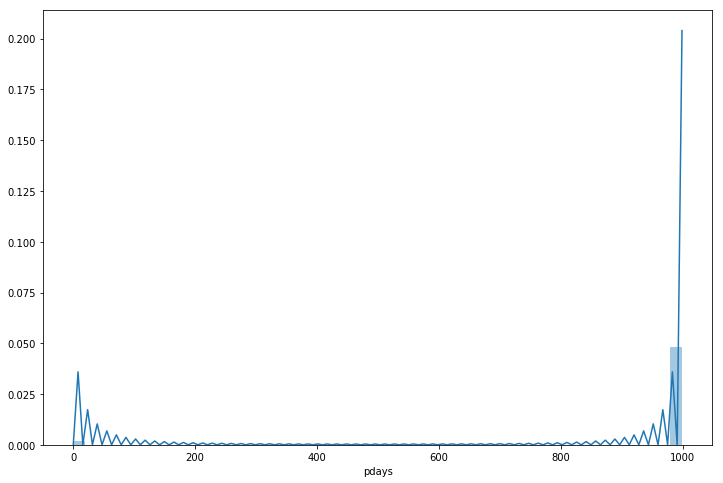

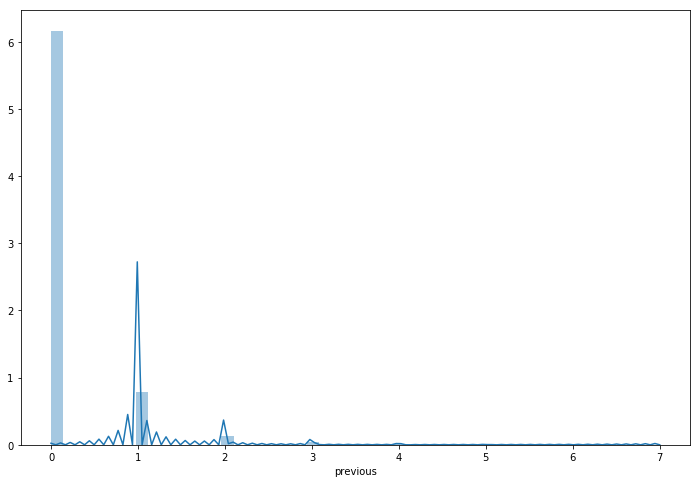

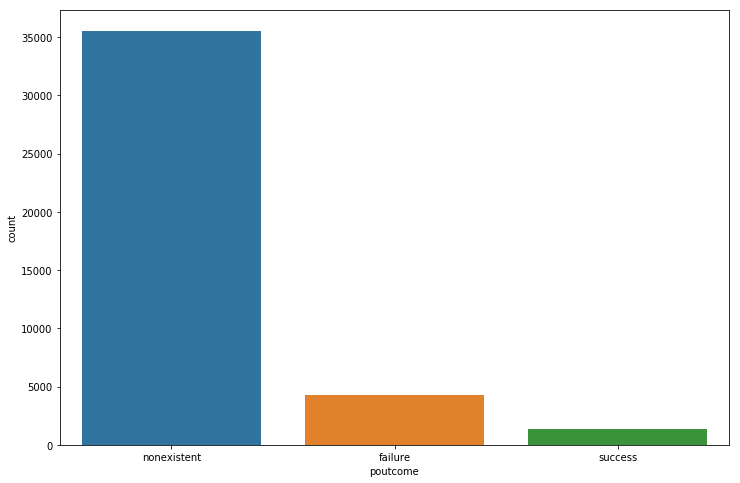

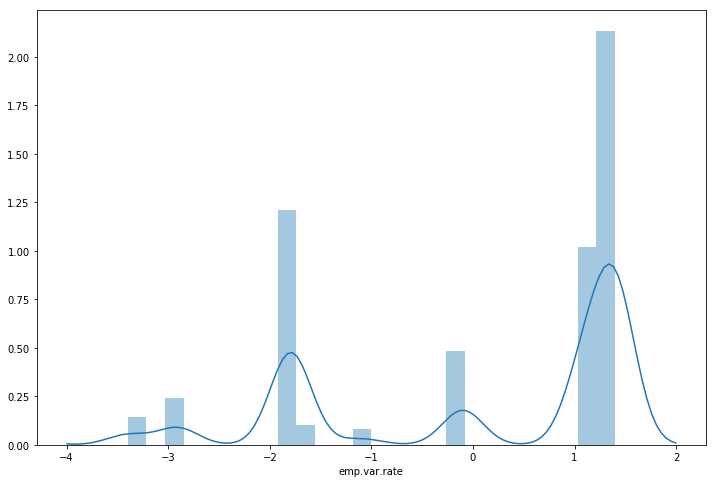

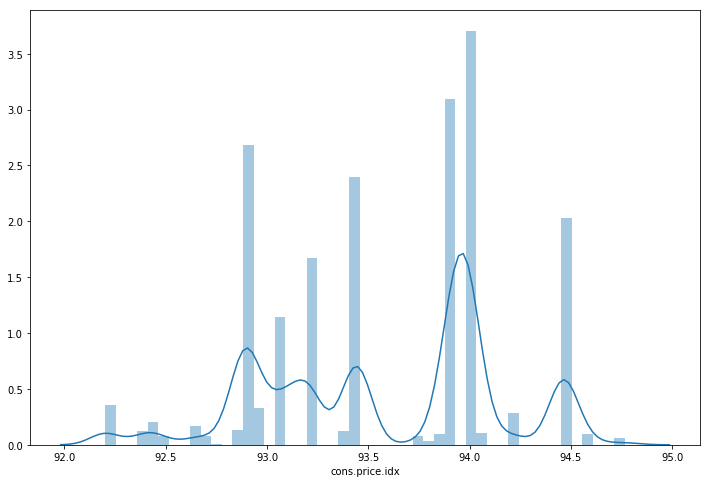

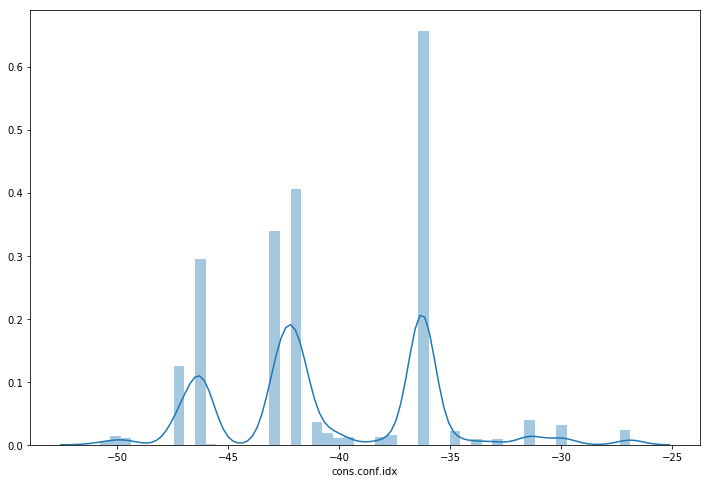

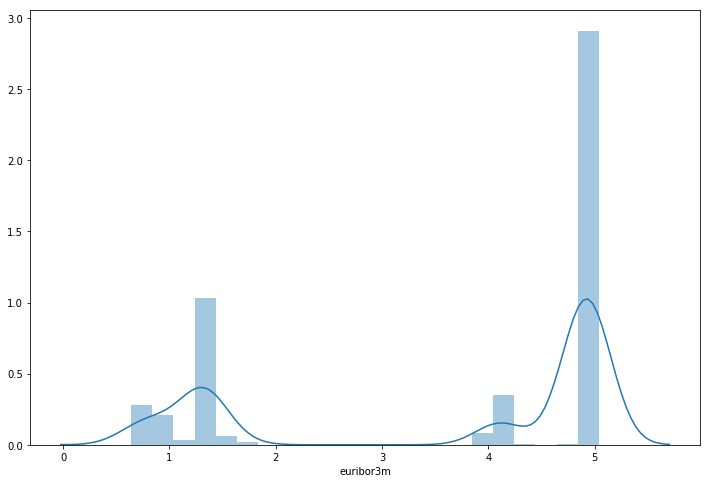

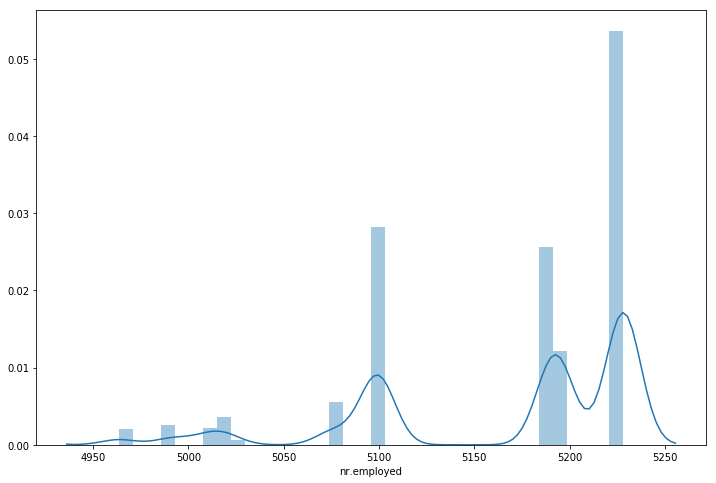

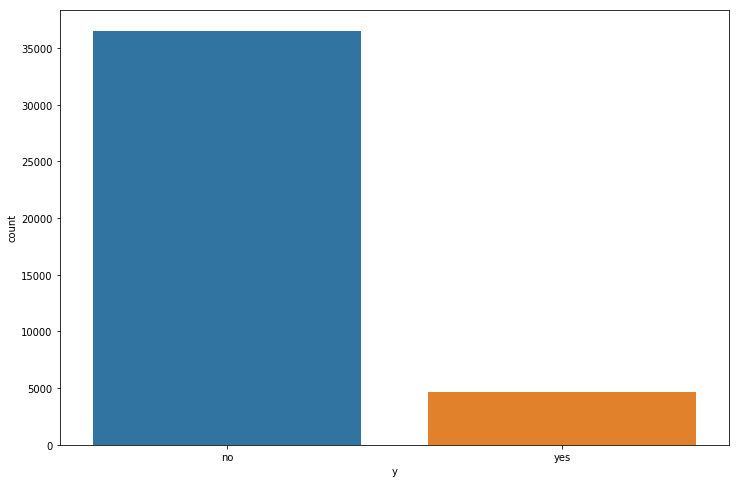

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
for i in A.columns:
    if A[i].dtypes == 'object':
        plt.figure(figsize=(12,8))
        sns.countplot(A[i])
        plt.show()
    else:
        plt.figure(figsize=(12,8))
        sns.distplot(A[i])
        plt.show

# Missing Value Treatment

In [9]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values='unknown',strategy='most_frequent')
B[['job']] = imp.fit_transform(B[['job']])

In [10]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values='unknown',strategy='most_frequent')
B[['marital']] = imp.fit_transform(B[['marital']])

In [11]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values='unknown',strategy='most_frequent')
B[['education']] = imp.fit_transform(B[['education']])

In [12]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values='unknown',strategy='most_frequent')
B[['default']] = imp.fit_transform(B[['default']])

In [13]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values='unknown',strategy='most_frequent')
B[['housing']] = imp.fit_transform(B[['housing']])

In [14]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values='unknown',strategy='most_frequent')
B[['loan']] = imp.fit_transform(B[['loan']])

In [15]:
B.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Removing records with duration zero as it defaults to value no for target variable

In [16]:
B = B[B['duration']!=0]

In [17]:
B.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41184.000000,41184.000000,41184.000000,41184.000000,41184.000000,41184.00000,41184.000000,41184.000000,41184.000000,41184.000000
mean,40.023529,258.310096,2.567381,962.471907,0.172980,0.08192,93.575686,-40.502508,3.621337,5167.037145
std,10.421044,259.279344,2.769895,186.919638,0.494922,1.57096,0.578849,4.628128,1.734438,72.252762
min,17.000000,1.000000,1.000000,0.000000,0.000000,-3.40000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.80000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.10000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.40000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.40000,94.767000,-26.900000,5.045000,5228.100000


Transforming duration variable to remove skewness

In [18]:
B['log_duration'] = np.log(B['duration'].astype('float64'))

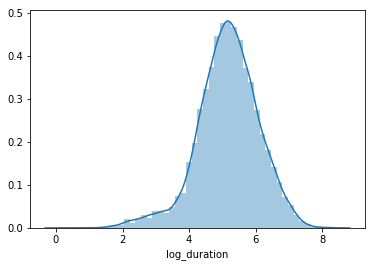

In [19]:
sns.distplot(B['log_duration'])

In [20]:
B = B.drop('duration',axis=1)

# Checking Distribution of data and removing outliers

In [21]:
Stats = pd.DataFrame(B.describe().transpose())

In [22]:
Stats

,count,mean,std,min,25%,50%,75%,max
age,41184.0,40.023529,10.421044,17.000,32.000000,38.000000,47.000000,98.000000
campaign,41184.0,2.567381,2.769895,1.000,1.000000,2.000000,3.000000,56.000000
pdays,41184.0,962.471907,186.919638,0.000,999.000000,999.000000,999.000000,999.000000
previous,41184.0,0.172980,0.494922,0.000,0.000000,0.000000,0.000000,7.000000
emp.var.rate,41184.0,0.081920,1.570960,-3.400,-1.800000,1.100000,1.400000,1.400000
cons.price.idx,41184.0,93.575686,0.578849,92.201,93.075000,93.749000,93.994000,94.767000
cons.conf.idx,41184.0,-40.502508,4.628128,-50.800,-42.700000,-41.800000,-36.400000,-26.900000
euribor3m,41184.0,3.621337,1.734438,0.634,1.344000,4.857000,4.961000,5.045000
nr.employed,41184.0,5167.037145,72.252762,4963.600,5099.100000,5191.000000,5228.100000,5228.100000
log_duration,41184.0,5.164072,0.927131,0.000,4.624973,5.192957,5.765191,8.500657


In [23]:
Stats['IQR'] = Stats['75%'] - Stats['25%']

In [24]:
Stats['low'] = Stats['25%'] - 1.5*Stats['IQR']

In [25]:
Stats['high'] = Stats['75%'] + 1.5*Stats['IQR']

In [26]:
Stats

,count,mean,std,min,25%,50%,75%,max,IQR,low,high
age,41184.0,40.023529,10.421044,17.000,32.000000,38.000000,47.000000,98.000000,15.000000,9.500000,69.500000
campaign,41184.0,2.567381,2.769895,1.000,1.000000,2.000000,3.000000,56.000000,2.000000,-2.000000,6.000000
pdays,41184.0,962.471907,186.919638,0.000,999.000000,999.000000,999.000000,999.000000,0.000000,999.000000,999.000000
previous,41184.0,0.172980,0.494922,0.000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000
emp.var.rate,41184.0,0.081920,1.570960,-3.400,-1.800000,1.100000,1.400000,1.400000,3.200000,-6.600000,6.200000
cons.price.idx,41184.0,93.575686,0.578849,92.201,93.075000,93.749000,93.994000,94.767000,0.919000,91.696500,95.372500
cons.conf.idx,41184.0,-40.502508,4.628128,-50.800,-42.700000,-41.800000,-36.400000,-26.900000,6.300000,-52.150000,-26.950000
euribor3m,41184.0,3.621337,1.734438,0.634,1.344000,4.857000,4.961000,5.045000,3.617000,-4.081500,10.386500
nr.employed,41184.0,5167.037145,72.252762,4963.600,5099.100000,5191.000000,5228.100000,5228.100000,129.000000,4905.600000,5421.600000
log_duration,41184.0,5.164072,0.927131,0.000,4.624973,5.192957,5.765191,8.500657,1.140218,2.914645,7.475519


In [27]:
B = B[B['campaign'] < Stats['high']['campaign']]
B = B[B['campaign'] > Stats['low']['campaign']]

In [28]:
B = B[B['cons.conf.idx'] < Stats['high']['cons.conf.idx']]
B = B[B['cons.conf.idx'] > Stats['low']['cons.conf.idx']]

In [29]:
B.shape

(37355, 21)

In [30]:
B = B[B['emp.var.rate'] < Stats['high']['emp.var.rate']]
B = B[B['emp.var.rate'] > Stats['low']['emp.var.rate']]

In [31]:
B.shape

(37355, 21)

In [32]:
B = B[B['cons.price.idx'] < Stats['high']['cons.price.idx']]
B = B[B['cons.price.idx'] > Stats['low']['cons.price.idx']]

In [33]:
B.shape

(37355, 21)

In [34]:
B = B[B['log_duration'] < Stats['high']['log_duration']]
B = B[B['log_duration'] > Stats['low']['log_duration']]

In [35]:
B.shape

(36746, 21)

In [36]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36746 entries, 0 to 41187
Data columns (total 21 columns):
age               36746 non-null int64
job               36746 non-null object
marital           36746 non-null object
education         36746 non-null object
default           36746 non-null object
housing           36746 non-null object
loan              36746 non-null object
contact           36746 non-null object
month             36746 non-null object
day_of_week       36746 non-null object
campaign          36746 non-null int64
pdays             36746 non-null int64
previous          36746 non-null int64
poutcome          36746 non-null object
emp.var.rate      36746 non-null float64
cons.price.idx    36746 non-null float64
cons.conf.idx     36746 non-null float64
euribor3m         36746 non-null float64
nr.employed       36746 non-null float64
y                 36746 non-null object
log_duration      36746 non-null float64
dtypes: float64(6), int64(4), object(11)
memory u

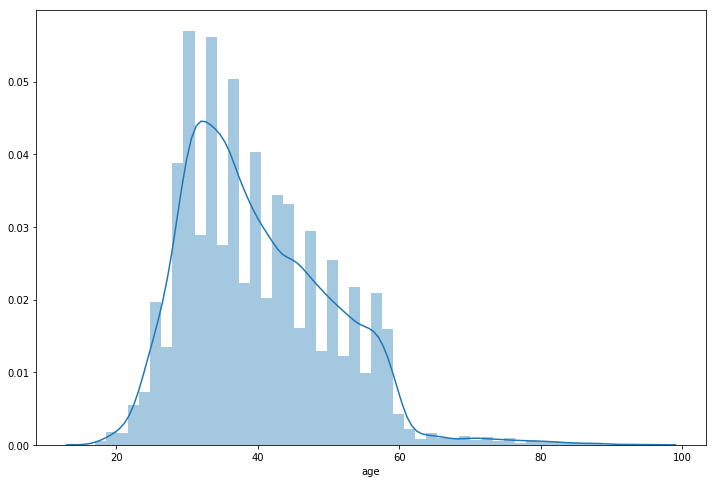

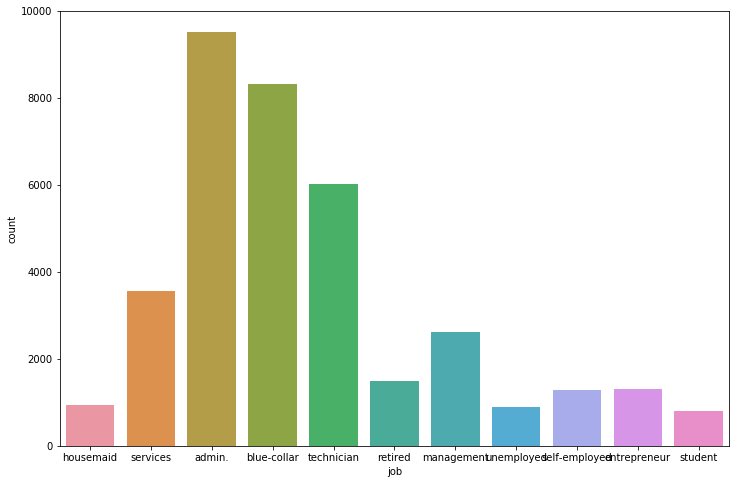

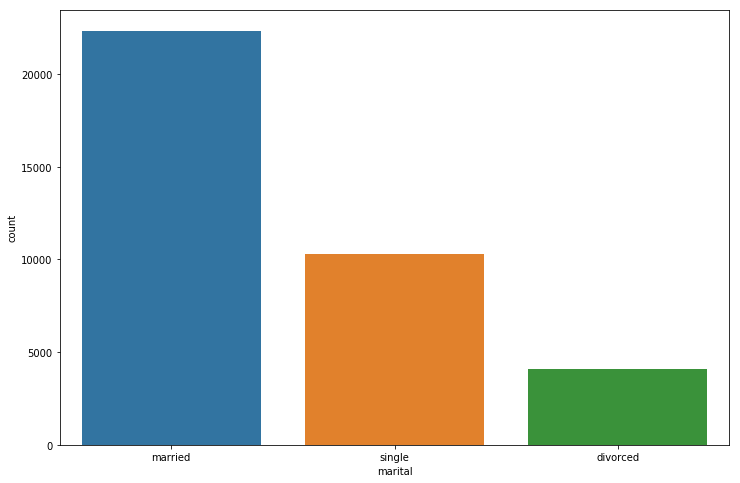

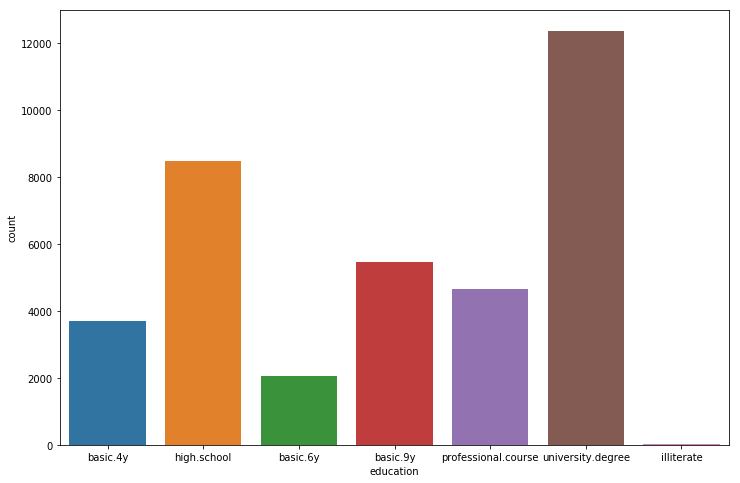

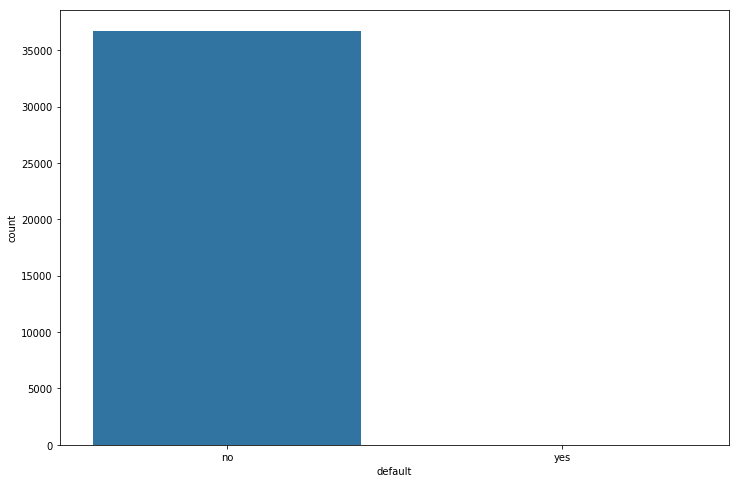

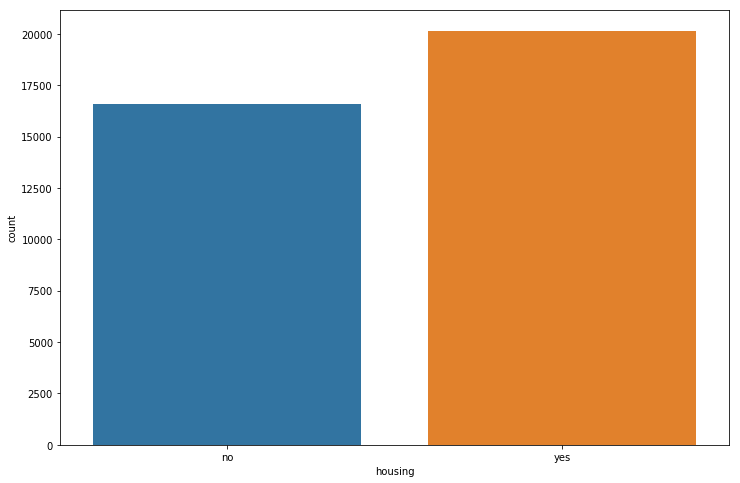

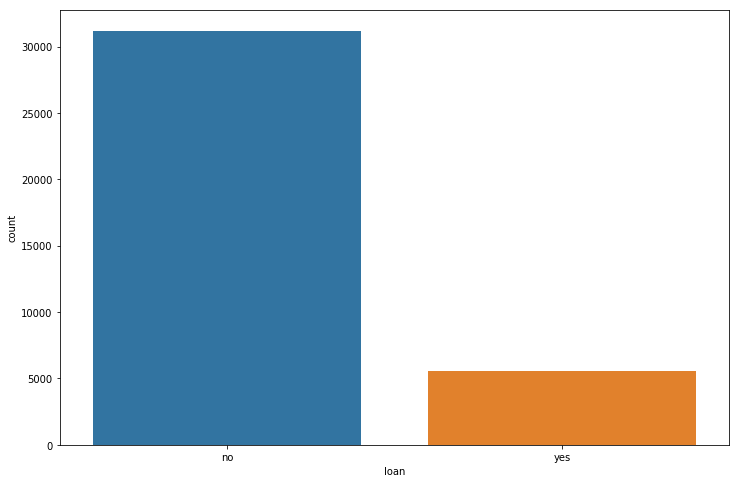

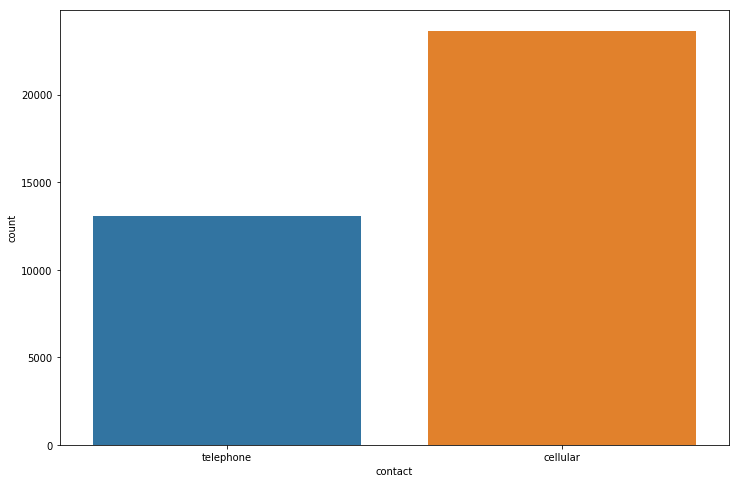

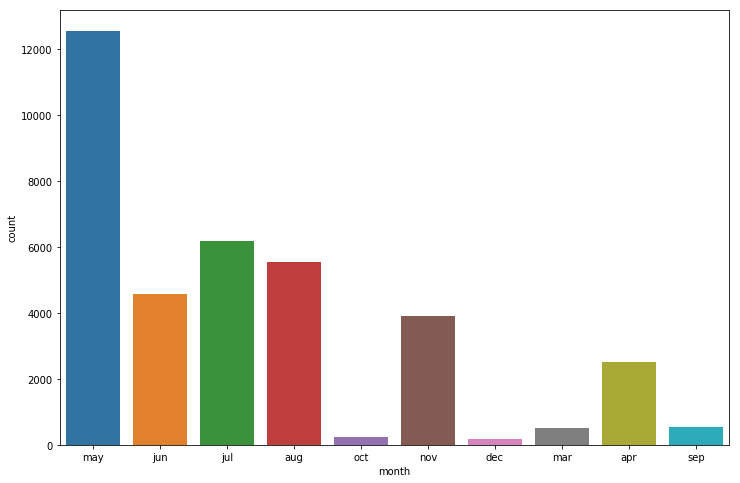

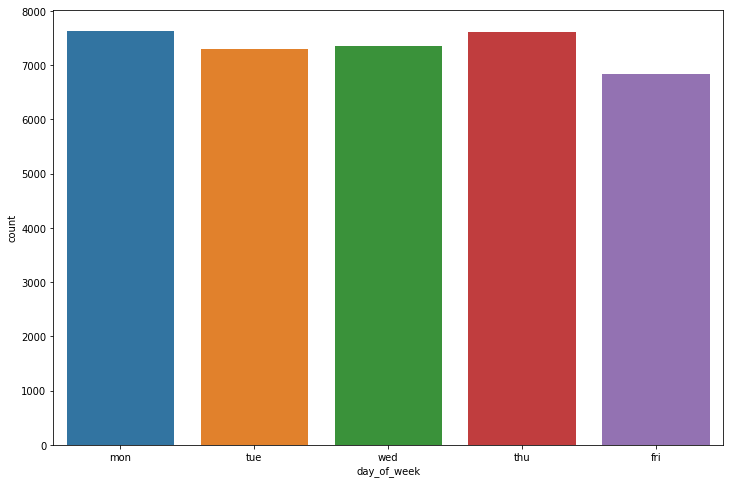

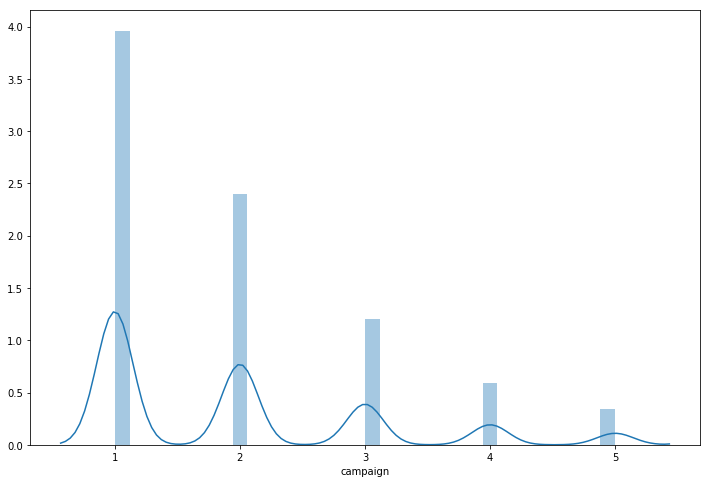

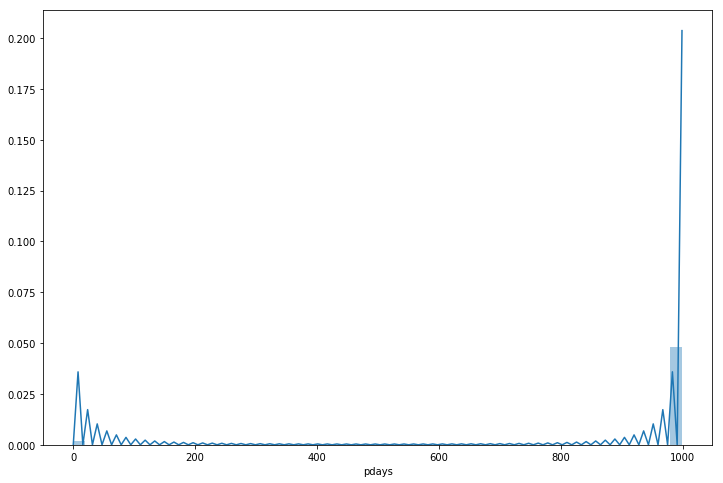

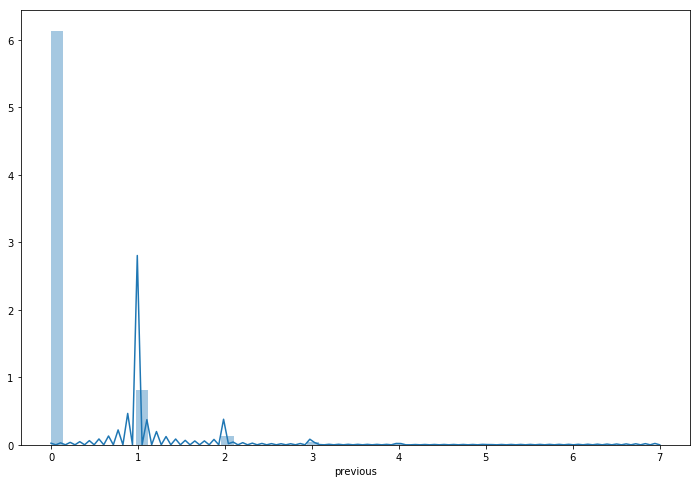

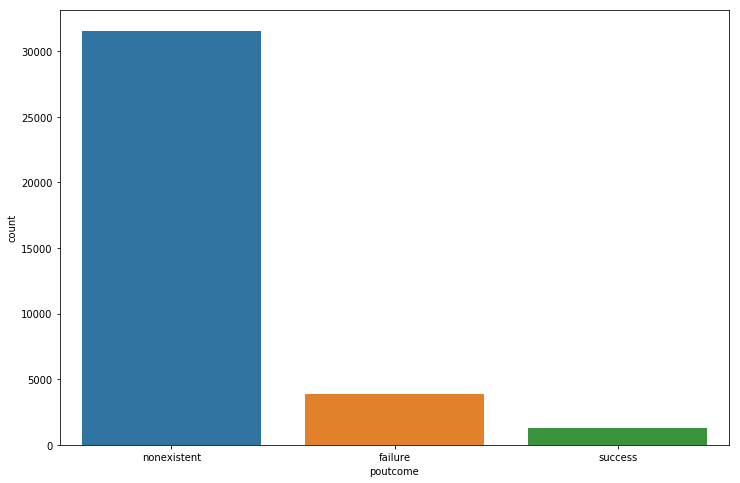

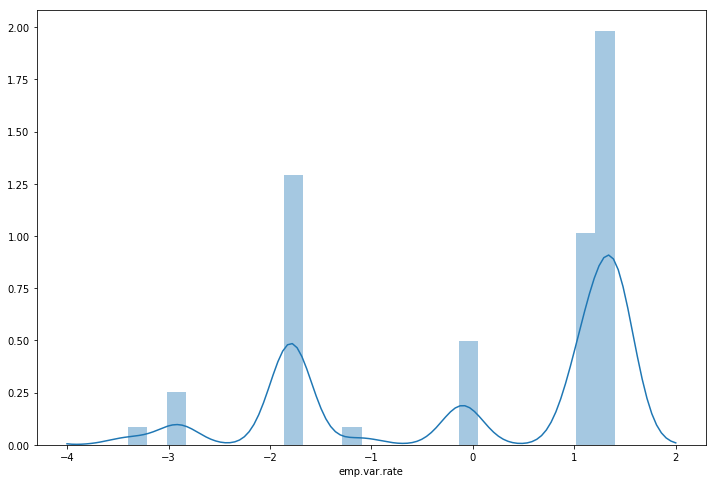

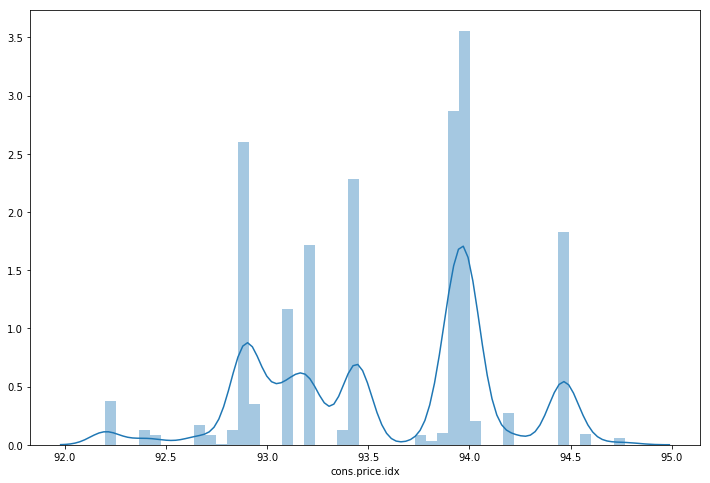

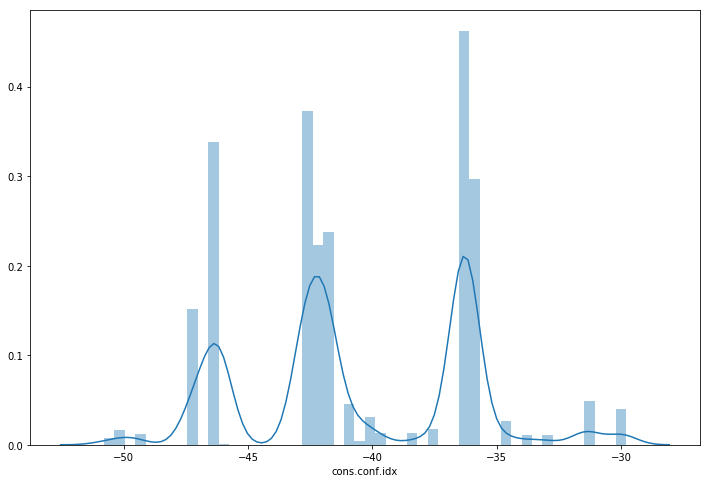

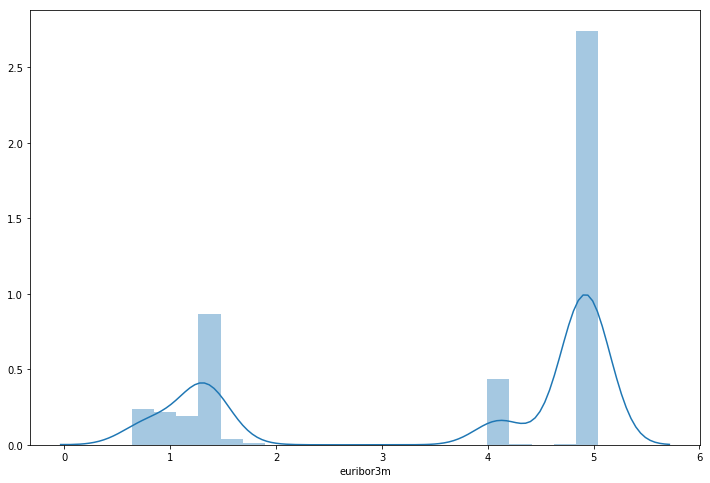

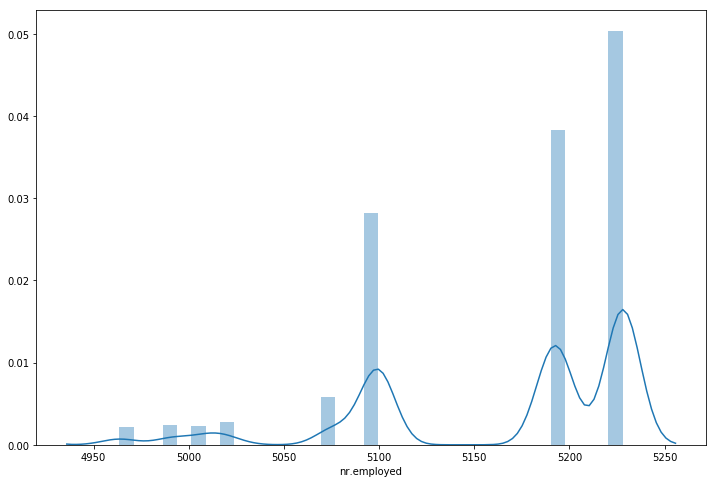

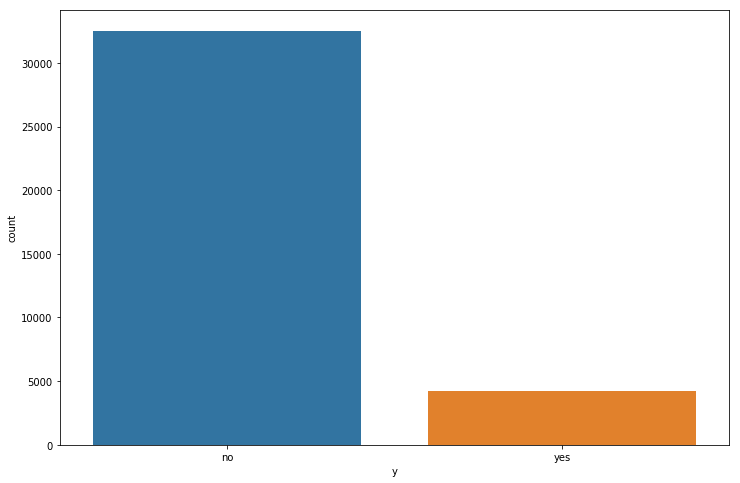

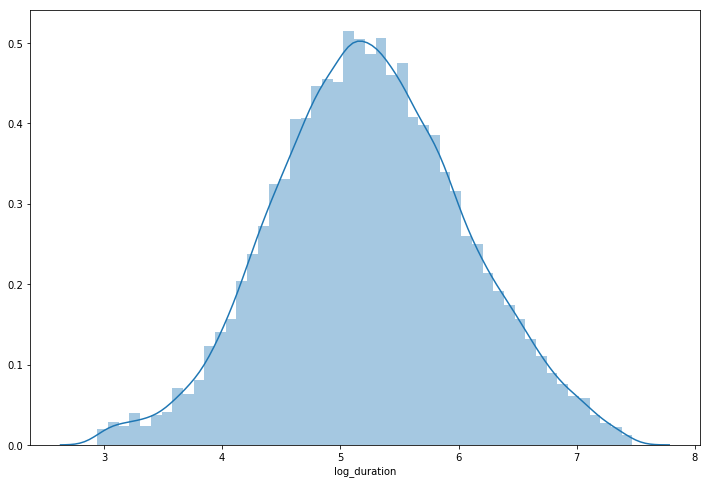

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
for i in B.columns:
    if B[i].dtypes == 'object':
        plt.figure(figsize=(12,8))
        sns.countplot(B[i])
        plt.show()
    else:
        plt.figure(figsize=(12,8))
        sns.distplot(B[i])
        plt.show

In [38]:
def boxplot(df,outcome):
    import seaborn as sns
    import matplotlib.pyplot as plt
    for i in df.columns:
            if df[i].dtypes != 'object':
                sns.boxplot(df[outcome],df[i])
                plt.show()

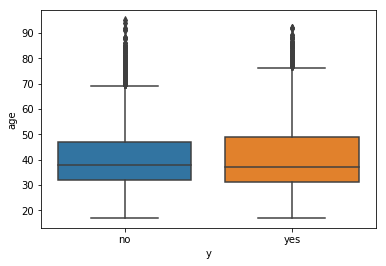

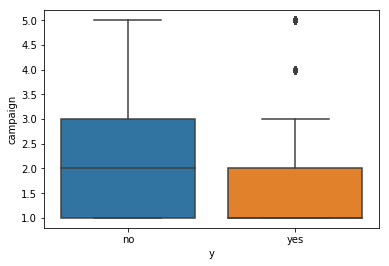

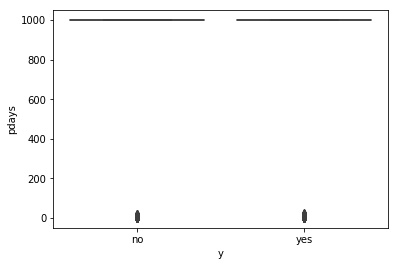

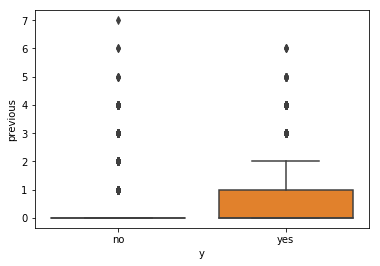

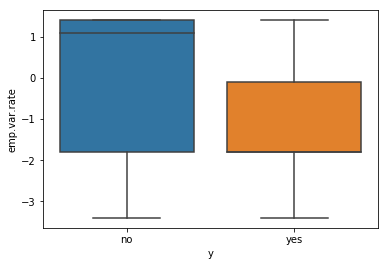

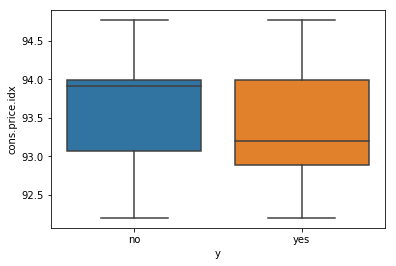

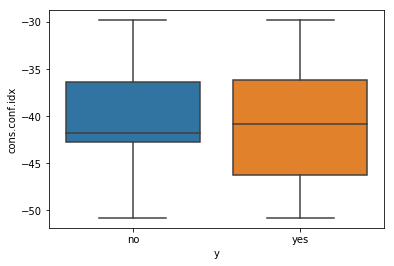

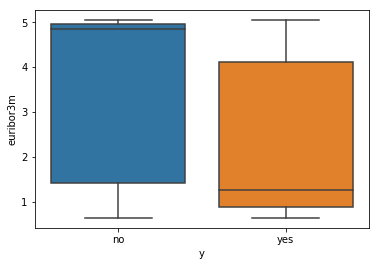

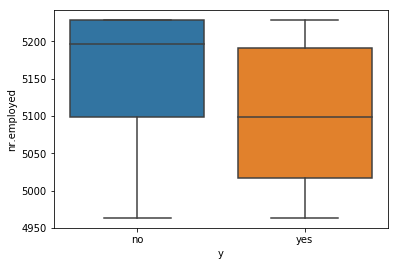

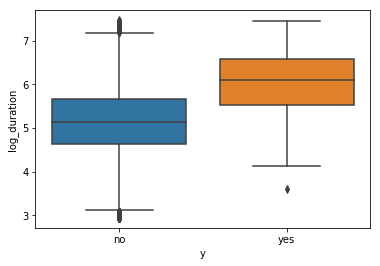

In [39]:
boxplot(B,'y')

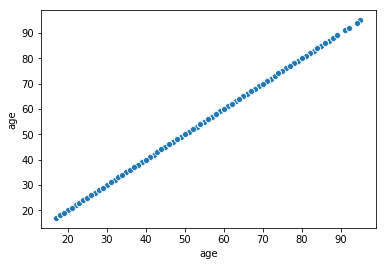

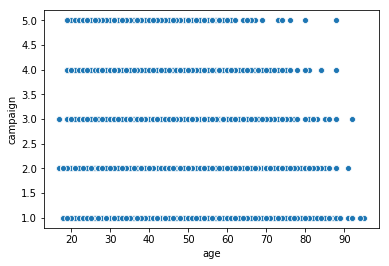

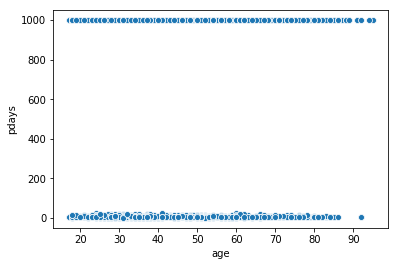

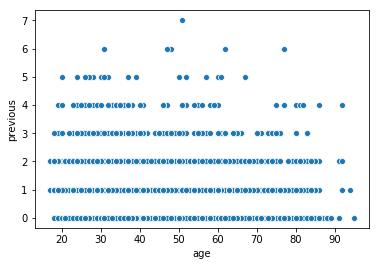

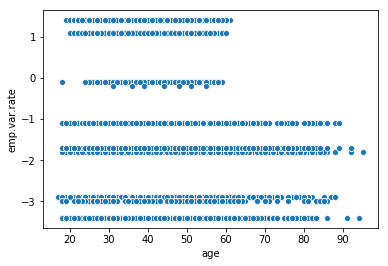

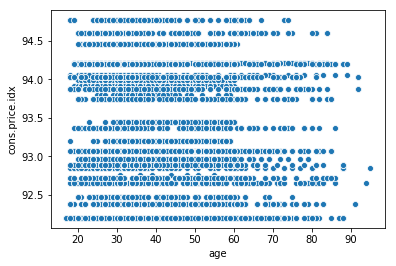

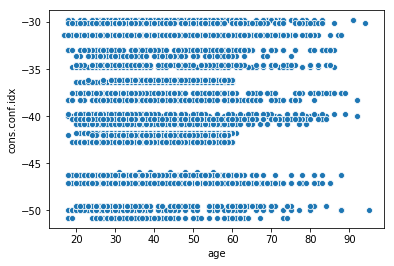

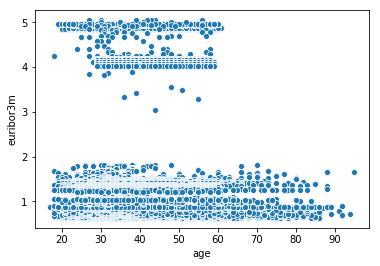

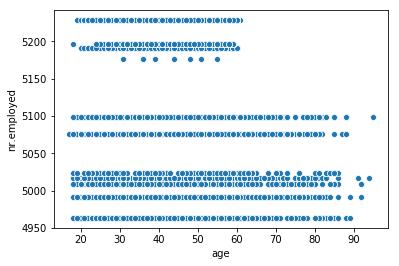

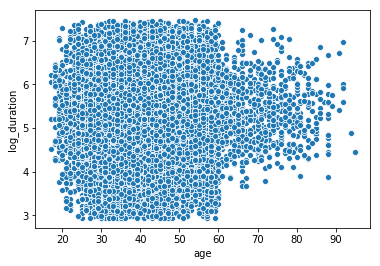

In [40]:
for i in B.columns:
    if B[i].dtypes != 'object':
            sns.scatterplot(B['age'],B[i])
            plt.show()

Label Encoding the data and extracting dependent and indepedent features separately

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
C = B.apply(le.fit_transform)

X = C.drop('y',axis=1)
Y = C[['y']]

# Identification of importance features based on feature importance, Recursive feature elimination and chi2 

In [42]:
np.set_printoptions(suppress=True)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model = rfc.fit(X,Y)
pred = model.predict(X)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred,Y)
print(accuracy)

0.993060469166712


In [43]:
VI = pd.DataFrame(model.feature_importances_,columns=['RF'],index=X.columns)

In [44]:
VI = VI.sort_values(by='RF',ascending=False).reset_index()

In [45]:
VI

,index,RF
0,log_duration,0.317207
1,euribor3m,0.132817
2,age,0.099419
3,nr.employed,0.068128
4,job,0.050297
5,day_of_week,0.044457
6,education,0.039455
7,campaign,0.039266
8,poutcome,0.033128
9,marital,0.024443


In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(X, Y)

In [47]:
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=X.columns)
Selected = Selected.reset_index()

In [48]:
Selected[Selected['RFE'] == True]

,index,RFE
0,age,True
1,job,True
2,marital,True
3,education,True
4,default,True
5,housing,True
6,loan,True
7,contact,True
8,month,True
9,day_of_week,True


In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(X, Y)

In [50]:
import numpy
numpy.set_printoptions(suppress=True)
print(fit.scores_)

[    123.98662983      75.83038508      27.43319041     156.63858292
       0.38870616       2.4532891        0.3900519      507.49416105
      25.09371507       8.69113506      75.86362459    2366.46910344
    2907.7037518       99.47037971    3512.38636476    1248.67225757
     276.26013991   88025.67952079    3726.64551646 1365948.97959764]


In [51]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=X.columns)

In [52]:
chi_sq = chi_sq.reset_index()

In [53]:
chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
19,log_duration,1365948.98
17,euribor3m,88025.68
18,nr.employed,3726.65
14,emp.var.rate,3512.39
12,previous,2907.70
11,pdays,2366.47
15,cons.price.idx,1248.67
7,contact,507.49
16,cons.conf.idx,276.26
3,education,156.64


In [54]:
final = pd.merge(chi_sq,Selected,on='index')
final = pd.merge(final,VI,on='index')
final

,index,Chi_Square,RFE,RF
0,age,123.99,True,0.10
1,job,75.83,True,0.05
2,marital,27.43,True,0.02
3,education,156.64,True,0.04
4,default,0.39,True,0.00
5,housing,2.45,True,0.02
6,loan,0.39,True,0.01
7,contact,507.49,True,0.01
8,month,25.09,True,0.02
9,day_of_week,8.69,True,0.04


In [55]:
columns = ['Chi_Square','RF']
#score_table = pd.DataFrame({},[])
#score_table['index'] = final['index']
for i in columns:
    final[i] = final['index'].isin(list(final.nlargest(10,i)['index'])).astype(int)

final['RFE'] = final['RFE'].astype(int)

In [56]:
final['final_score'] = final.sum(axis=1)

In [57]:
final.sort_values('final_score',ascending=False)

,index,Chi_Square,RFE,RF,final_score
19,log_duration,1,1,1,3
18,nr.employed,1,1,1,3
3,education,1,1,1,3
17,euribor3m,1,1,1,3
11,pdays,1,1,0,2
16,cons.conf.idx,1,1,0,2
15,cons.price.idx,1,1,0,2
14,emp.var.rate,1,1,0,2
13,poutcome,0,1,1,2
12,previous,1,1,0,2


In [58]:
final[final['final_score'] > 2 ]

,index,Chi_Square,RFE,RF,final_score
3,education,1,1,1,3
17,euribor3m,1,1,1,3
18,nr.employed,1,1,1,3
19,log_duration,1,1,1,3


In [59]:
imp_features = list(final[final['final_score'] > 2 ]['index'])
imp_features

['education', 'euribor3m', 'nr.employed', 'log_duration']

In [60]:
D = pd.DataFrame()
for i in imp_features:
    D[i] = C[i]
D['y'] = C['y']

In [61]:
D.head()

,education,euribor3m,nr.employed,log_duration,y
0,0,272,8,242,0
1,3,272,8,130,0
2,3,272,8,207,0
3,1,272,8,132,0
4,3,272,8,288,0


In [62]:
X = D.drop('y',axis=1)
Y = D[['y']]

# Multicolinearity Check

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(features):
    vif = pd.DataFrame()
    vif['features'] = features.columns
    vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    return vif

In [64]:
vif = calculate_vif(X)

In [65]:
vif[vif['VIF'] > 10]

,features,VIF
1,euribor3m,72.00
2,nr.employed,67.44


In [66]:
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['features'][:1]
    X.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(X)

In [67]:
vif

,features,VIF
0,education,3.25
1,nr.employed,3.67
2,log_duration,1.91


In [68]:
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['features'][:1]
    X.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(X)

In [69]:
vif

,features,VIF
0,education,3.25
1,nr.employed,3.67
2,log_duration,1.91


In [70]:
vif.nlargest(5,columns='VIF')

,features,VIF
1,nr.employed,3.67
0,education,3.25
2,log_duration,1.91


In [71]:
X.head()

,education,nr.employed,log_duration
0,0,8,242
1,3,8,130
2,3,8,207
3,1,8,132
4,3,8,288


       education  nr.employed  log_duration
4073           2            8           196
11019          2           10            77
40354          6            1           153
20879          3           10            22
27125          0            9            86
       education  nr.employed  log_duration
32819          3            6           413
27172          6            9            30
17295          5           10            99
13619          6           10           311
32272          6            6          1183


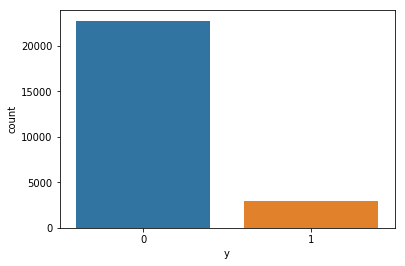

In [72]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=15)
sns.countplot(ytrain.y)
print(xtrain.head())
print(xtest.head())

# Removing class imbalance which can cause biased behaviour of our model 

In [73]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=25)
xtrain_res, ytrain_res = smk.fit_sample(xtrain,ytrain)
xtrain_res = pd.DataFrame(xtrain_res,columns=X.columns)
ytrain_res = pd.DataFrame(ytrain_res,columns=Y.columns)
xtest_res, ytest_res = smk.fit_sample(xtest,ytest)
xtest_res = pd.DataFrame(xtest_res,columns=X.columns)
ytest_res = pd.DataFrame(ytest_res,columns=Y.columns)

# Logistic regression model

In [74]:
import statsmodels.api as sm
xtrain_res2 = sm.add_constant(xtrain_res)
est = sm.Logit(ytrain_res,xtrain_res2)
model = est.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.354610
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45260
Model:                          Logit   Df Residuals:                    45256
Method:                           MLE   Df Model:                            3
Date:                Sun, 10 Nov 2019   Pseudo R-squ.:                  0.4884
Time:                        20:27:53   Log-Likelihood:                -16050.
converged:                       True   LL-Null:                       -31372.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.6335      0.051     32.013      0.000       1.534       1.734
education        0.0911      0.007     13.039      0.000       0.077       0.105
nr.employed     -0.6372      0.007    -94.118      0.000      -0.650      -0.624
log_duration     0.0068   7.28e-05     93.997      0.000       0.007       0.007
================================================================================
"""

In [75]:
xtrain_res.head()

,education,nr.employed,log_duration
0,2,8,196
1,2,10,77
2,6,1,153
3,3,10,22
4,0,9,86


Logistic Regression Results:

f1_score train: 0.8491888644101743
accuracy_score train: 0.8502651347768448
precision_score train: 0.8553368897655445
recall_score train: 0.8431285903667698
Mean Accuracy and CI: 0.85 (+/- 0.01)


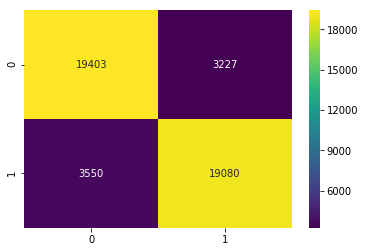

C:\Users\shubham\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


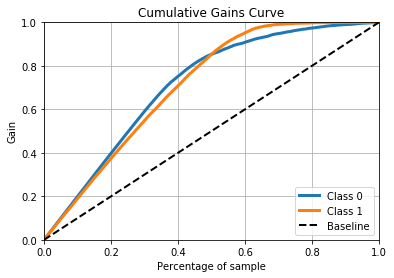

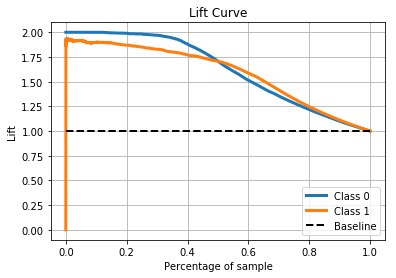

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import scikitplot as skplt

lr = LogisticRegression()
model = lr.fit(xtrain_res,ytrain_res)
pred_train = model.predict(xtrain_res)
pred_prob_train = model.predict_proba(xtrain_res)

from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score,accuracy_score,classification_report
print('Logistic Regression Results:\n')
print('f1_score train:',f1_score(ytrain_res,pred_train))
print('accuracy_score train:',accuracy_score(ytrain_res,pred_train))
print('precision_score train:',precision_score(ytrain_res,pred_train))
print('recall_score train:',recall_score(ytrain_res,pred_train))

scores = cross_val_score(model, xtrain_res, ytrain_res, cv=5)
print("Mean Accuracy and CI: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

sns.heatmap(confusion_matrix(ytrain_res,pred_train),annot=True,cmap='viridis',fmt='g')
plt.show()

skplt.metrics.plot_cumulative_gain(ytrain_res, pred_prob_train)
plt.show()

skplt.metrics.plot_lift_curve(ytrain_res, pred_prob_train)
plt.show()

f1_score test: 0.8520883492096724
accuracy_score test: 0.8538930824113329
precision_score test: 0.8627450980392157
recall_score test: 0.8416916554647916
Mean Accuracy and CI: 0.85 (+/- 0.02)


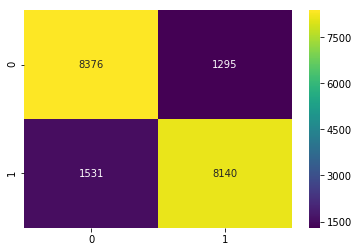

C:\Users\shubham\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


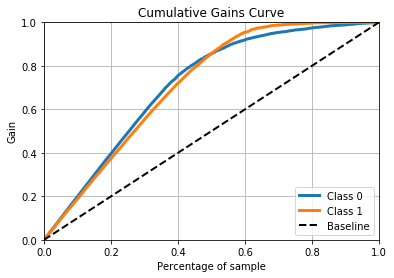

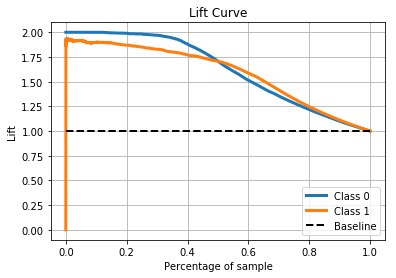

In [77]:
pred_test = model.predict(xtest_res)
pred_test_prob = model.predict_proba(xtest_res)

print('f1_score test:',f1_score(ytest_res,pred_test))
print('accuracy_score test:',accuracy_score(ytest_res,pred_test))
print('precision_score test:',precision_score(ytest_res,pred_test))
print('recall_score test:',recall_score(ytest_res,pred_test))

scores = cross_val_score(model, xtest_res, ytest_res, cv=5)
print("Mean Accuracy and CI: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

sns.heatmap(confusion_matrix(ytest_res,pred_test),annot=True,cmap='viridis',fmt='g')
plt.show()

skplt.metrics.plot_cumulative_gain(ytest_res, pred_test_prob)
plt.show()

skplt.metrics.plot_lift_curve(ytrain_res, pred_prob_train)
plt.show()

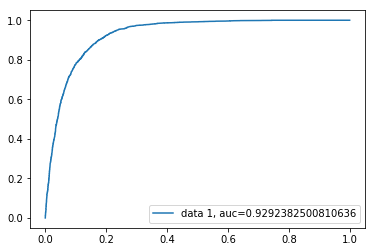

In [78]:
from sklearn.metrics import roc_auc_score,roc_curve
ytest_pred_proba = model.predict_proba(xtest_res)[::,1]
fpr, tpr, _ = roc_curve(ytest_res,ytest_pred_proba)
auc = roc_auc_score(ytest_res, ytest_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Decision Tree Classifier

Decision Tree Results:

f1_score train: 0.9625994694960213
accuracy_score train: 0.9626159964648696
precision_score train: 0.9630252100840336
recall_score train: 0.9621741051701281
Mean Accuracy and CI: 0.91 (+/- 0.02)


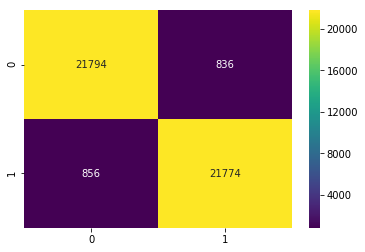

C:\Users\shubham\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


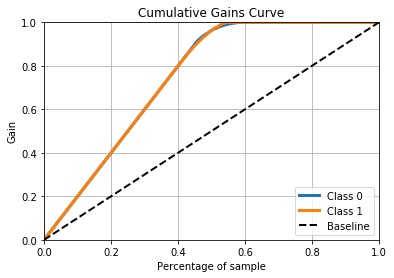

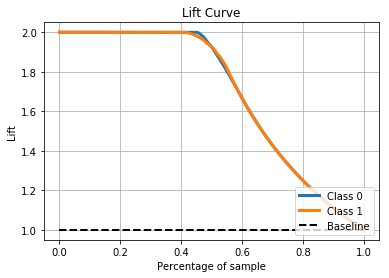

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=24)
model = dtc.fit(xtrain_res,ytrain_res)
pred_train = model.predict(xtrain_res)
pred_prob_train = model.predict_proba(xtrain_res)

from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score,accuracy_score,classification_report
print('Decision Tree Results:\n')
print('f1_score train:',f1_score(ytrain_res,pred_train))
print('accuracy_score train:',accuracy_score(ytrain_res,pred_train))
print('precision_score train:',precision_score(ytrain_res,pred_train))
print('recall_score train:',recall_score(ytrain_res,pred_train))

scores = cross_val_score(model, xtrain_res, ytrain_res, cv=5)
print("Mean Accuracy and CI: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

sns.heatmap(confusion_matrix(ytrain_res,pred_train),annot=True,cmap='viridis',fmt='g')
plt.show()

skplt.metrics.plot_cumulative_gain(ytrain_res, pred_prob_train)
plt.show()

skplt.metrics.plot_lift_curve(ytrain_res, pred_prob_train)
plt.show()

# Hyper Parameter Tuning of Decision Tree to avoid overfitting issue

from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf':range(2,8,1),'random_state':range(1,30,1),'criterion':['gini','entropy']}
dtc = DecisionTreeClassifier()
cv = GridSearchCV(dtc,params,scoring='accuracy',cv=5)
model = cv.fit(xtrain_res,ytrain_res)
model.best_params_

Decision Tree Results:

f1_score train: 0.9416395163230052
accuracy_score train: 0.9410296067167477
precision_score train: 0.9320001731376878
recall_score train: 0.951480335837384
Mean Accuracy and CI: 0.90 (+/- 0.03)


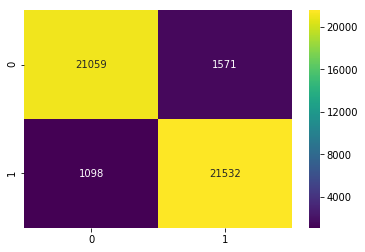

C:\Users\shubham\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


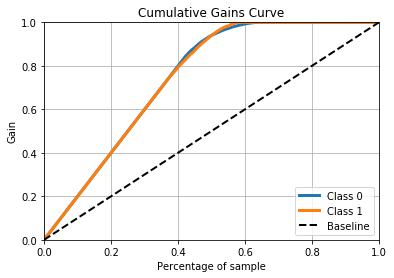

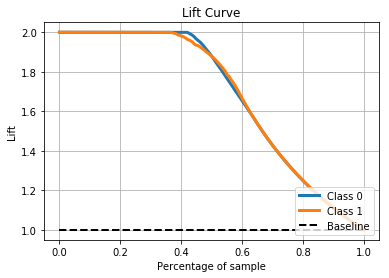

In [80]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',min_samples_leaf=3,random_state=29)
model = dtc.fit(xtrain_res,ytrain_res)
pred_train = model.predict(xtrain_res)
pred_prob_train = model.predict_proba(xtrain_res)

from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score,accuracy_score,classification_report
print('Decision Tree Results:\n')
print('f1_score train:',f1_score(ytrain_res,pred_train))
print('accuracy_score train:',accuracy_score(ytrain_res,pred_train))
print('precision_score train:',precision_score(ytrain_res,pred_train))
print('recall_score train:',recall_score(ytrain_res,pred_train))

scores = cross_val_score(model, xtrain_res, ytrain_res, cv=5)
print("Mean Accuracy and CI: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

sns.heatmap(confusion_matrix(ytrain_res,pred_train),annot=True,cmap='viridis',fmt='g')
plt.show()

skplt.metrics.plot_cumulative_gain(ytrain_res, pred_prob_train)
plt.show()

skplt.metrics.plot_lift_curve(ytrain_res, pred_prob_train)
plt.show()

f1_score test: 0.8070705375622308
accuracy_score test: 0.8216833833109296
precision_score test: 0.8791128442602973
recall_score test: 0.7459414745114259
Mean Accuracy and CI: 0.90 (+/- 0.02)


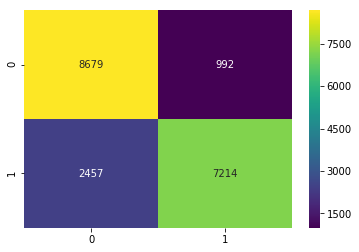

C:\Users\shubham\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


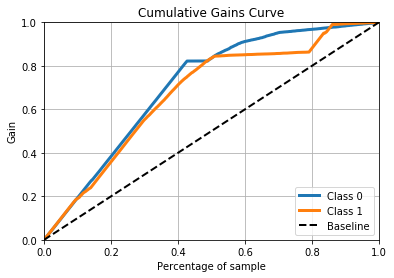

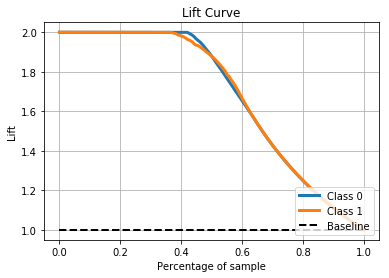

In [81]:
pred_test = model.predict(xtest_res)
pred_test_prob = model.predict_proba(xtest_res)

print('f1_score test:',f1_score(ytest_res,pred_test))
print('accuracy_score test:',accuracy_score(ytest_res,pred_test))
print('precision_score test:',precision_score(ytest_res,pred_test))
print('recall_score test:',recall_score(ytest_res,pred_test))

scores = cross_val_score(model, xtest_res, ytest_res, cv=5)
print("Mean Accuracy and CI: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

sns.heatmap(confusion_matrix(ytest_res,pred_test),annot=True,cmap='viridis',fmt='g')
plt.show()

skplt.metrics.plot_cumulative_gain(ytest_res, pred_test_prob)
plt.show()

skplt.metrics.plot_lift_curve(ytrain_res, pred_prob_train)
plt.show()

# Random Forest Classifier

Random Forest Results:

f1_score train: 0.9416395163230052
accuracy_score train: 0.9410296067167477
precision_score train: 0.9320001731376878
recall_score train: 0.951480335837384
Mean Accuracy and CI: 0.90 (+/- 0.03)


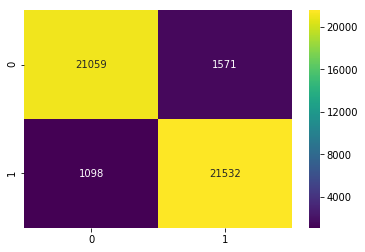

C:\Users\shubham\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


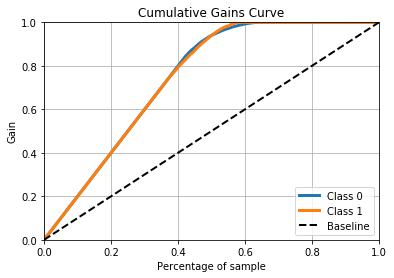

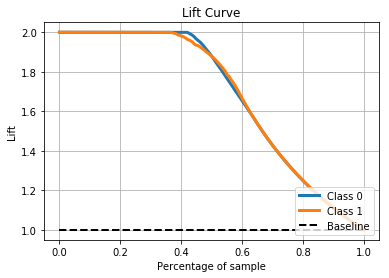

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=29)
model = dtc.fit(xtrain_res,ytrain_res)
pred_train = model.predict(xtrain_res)
pred_prob_train = model.predict_proba(xtrain_res)

from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score,accuracy_score,classification_report
print('Random Forest Results:\n')
print('f1_score train:',f1_score(ytrain_res,pred_train))
print('accuracy_score train:',accuracy_score(ytrain_res,pred_train))
print('precision_score train:',precision_score(ytrain_res,pred_train))
print('recall_score train:',recall_score(ytrain_res,pred_train))

scores = cross_val_score(model, xtrain_res, ytrain_res, cv=5)
print("Mean Accuracy and CI: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

sns.heatmap(confusion_matrix(ytrain_res,pred_train),annot=True,cmap='viridis',fmt='g')
plt.show()

skplt.metrics.plot_cumulative_gain(ytrain_res, pred_prob_train)
plt.show()

skplt.metrics.plot_lift_curve(ytrain_res, pred_prob_train)
plt.show()

# Hyper Parameter Tuning of Random Forest to avoid overfitting issue

from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf':range(2,8,1),'criterion':['gini','entropy'],'n_estimators':[100,200,300,500]}
rfc = RandomForestClassifier(random_state=24)
cv = GridSearchCV(rfc,params,scoring='accuracy',cv=5)
model = cv.fit(xtrain_res,ytrain_res)
model.best_params_

Random Forest Results:

f1_score train: 0.9416395163230052
accuracy_score train: 0.9410296067167477
precision_score train: 0.9320001731376878
recall_score train: 0.951480335837384
Mean Accuracy and CI: 0.90 (+/- 0.03)


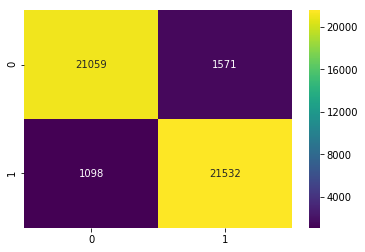

C:\Users\shubham\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


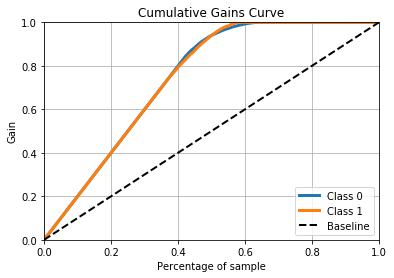

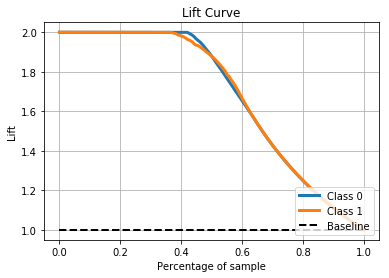

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=29,criterion='entropy',min_samples_leaf=2,n_estimators=300)
model = dtc.fit(xtrain_res,ytrain_res)
pred_train = model.predict(xtrain_res)
pred_prob_train = model.predict_proba(xtrain_res)

from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score,accuracy_score,classification_report
print('Random Forest Results:\n')
print('f1_score train:',f1_score(ytrain_res,pred_train))
print('accuracy_score train:',accuracy_score(ytrain_res,pred_train))
print('precision_score train:',precision_score(ytrain_res,pred_train))
print('recall_score train:',recall_score(ytrain_res,pred_train))

scores = cross_val_score(model, xtrain_res, ytrain_res, cv=5)
print("Mean Accuracy and CI: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

sns.heatmap(confusion_matrix(ytrain_res,pred_train),annot=True,cmap='viridis',fmt='g')
plt.show()

skplt.metrics.plot_cumulative_gain(ytrain_res, pred_prob_train)
plt.show()

skplt.metrics.plot_lift_curve(ytrain_res, pred_prob_train)
plt.show()

f1_score test: 0.8070705375622308
accuracy_score test: 0.8216833833109296
precision_score test: 0.8791128442602973
recall_score test: 0.7459414745114259
Mean Accuracy and CI: 0.90 (+/- 0.02)


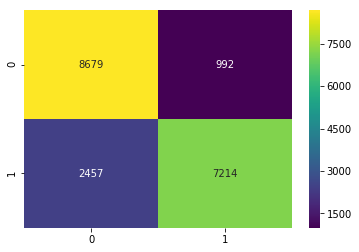

C:\Users\shubham\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


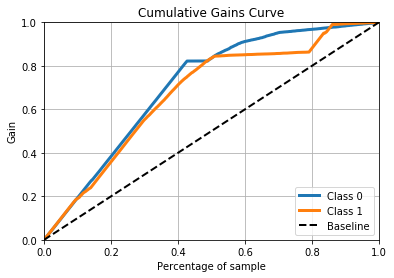

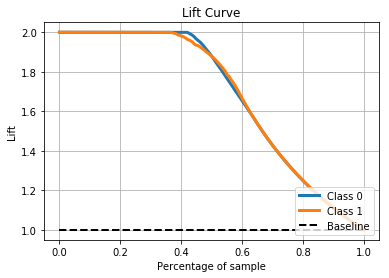

In [84]:
pred_test = model.predict(xtest_res)
pred_test_prob = model.predict_proba(xtest_res)

print('f1_score test:',f1_score(ytest_res,pred_test))
print('accuracy_score test:',accuracy_score(ytest_res,pred_test))
print('precision_score test:',precision_score(ytest_res,pred_test))
print('recall_score test:',recall_score(ytest_res,pred_test))

scores = cross_val_score(model, xtest_res, ytest_res, cv=5)
print("Mean Accuracy and CI: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

sns.heatmap(confusion_matrix(ytest_res,pred_test),annot=True,cmap='viridis',fmt='g')
plt.show()

skplt.metrics.plot_cumulative_gain(ytest_res, pred_test_prob)
plt.show()

skplt.metrics.plot_lift_curve(ytrain_res, pred_prob_train)
plt.show()

# xGradient Boosting Model

Random Forest Results:

f1_score train: 0.893326462251997
accuracy_score train: 0.890234202386213
precision_score train: 0.8688497201570462
recall_score train: 0.919222271321255
Mean Accuracy and CI: 0.89 (+/- 0.02)


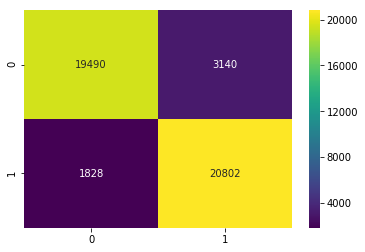

C:\Users\shubham\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


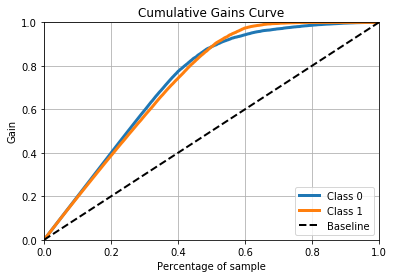

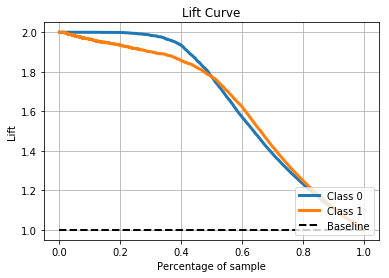

In [85]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=29)
model = xgb.fit(xtrain_res,ytrain_res)
pred_train = model.predict(xtrain_res)
pred_prob_train = model.predict_proba(xtrain_res)

from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score,accuracy_score,classification_report
print('Random Forest Results:\n')
print('f1_score train:',f1_score(ytrain_res,pred_train))
print('accuracy_score train:',accuracy_score(ytrain_res,pred_train))
print('precision_score train:',precision_score(ytrain_res,pred_train))
print('recall_score train:',recall_score(ytrain_res,pred_train))

scores = cross_val_score(model, xtrain_res, ytrain_res, cv=5)
print("Mean Accuracy and CI: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

sns.heatmap(confusion_matrix(ytrain_res,pred_train),annot=True,cmap='viridis',fmt='g')
plt.show()

skplt.metrics.plot_cumulative_gain(ytrain_res, pred_prob_train)
plt.show()

skplt.metrics.plot_lift_curve(ytrain_res, pred_prob_train)
plt.show()

# Hyper Parameter Tuning of Boosting Model to avoid overfitting issue

from sklearn.model_selection import GridSearchCV
params = {'max_depth':range(2,10,1), 'learning_rate':[0.1,0.5,0.01,0.05],'n_estimators':[100,200,300,500]}
xgb  = XGBClassifier(random_state=29,)
cv = GridSearchCV(xgb,params,scoring='accuracy',cv=5)
model = cv.fit(xtrain_res,ytrain_res)
model.best_params_

Random Forest Results:

f1_score train: 0.9467100977198696
accuracy_score train: 0.9457799381352188
precision_score train: 0.9307429547395388
recall_score train: 0.9632346442775077
Mean Accuracy and CI: 0.91 (+/- 0.02)


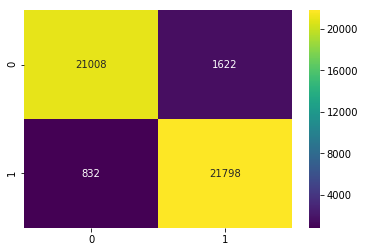

C:\Users\shubham\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


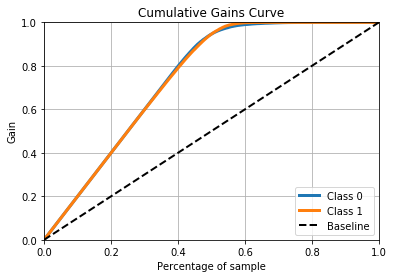

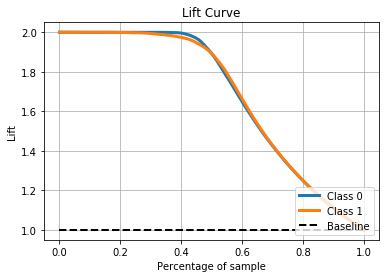

In [86]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=29,learning_rate=0.5,max_depth=7,n_estimators=300)
model = xgb.fit(xtrain_res,ytrain_res)
pred_train = model.predict(xtrain_res)
pred_prob_train = model.predict_proba(xtrain_res)

from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score,accuracy_score,classification_report
print('Random Forest Results:\n')
print('f1_score train:',f1_score(ytrain_res,pred_train))
print('accuracy_score train:',accuracy_score(ytrain_res,pred_train))
print('precision_score train:',precision_score(ytrain_res,pred_train))
print('recall_score train:',recall_score(ytrain_res,pred_train))

scores = cross_val_score(model, xtrain_res, ytrain_res, cv=5)
print("Mean Accuracy and CI: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

sns.heatmap(confusion_matrix(ytrain_res,pred_train),annot=True,cmap='viridis',fmt='g')
plt.show()

skplt.metrics.plot_cumulative_gain(ytrain_res, pred_prob_train)
plt.show()

skplt.metrics.plot_lift_curve(ytrain_res, pred_prob_train)
plt.show()

f1_score test: 0.8231532524807057
accuracy_score test: 0.8341433150656602
precision_score test: 0.8815680717912386
recall_score test: 0.7719987591769207
Mean Accuracy and CI: 0.92 (+/- 0.03)


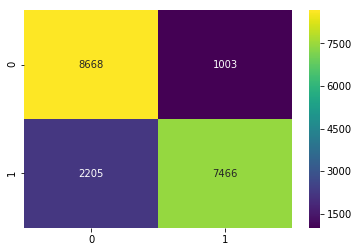

C:\Users\shubham\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


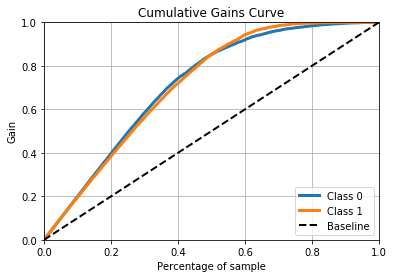

In [87]:
pred_test = model.predict(xtest_res)
pred_test_prob = model.predict_proba(xtest_res)

print('f1_score test:',f1_score(ytest_res,pred_test))
print('accuracy_score test:',accuracy_score(ytest_res,pred_test))
print('precision_score test:',precision_score(ytest_res,pred_test))
print('recall_score test:',recall_score(ytest_res,pred_test))

scores = cross_val_score(model, xtest_res, ytest_res, cv=5)
print("Mean Accuracy and CI: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

sns.heatmap(confusion_matrix(ytest_res,pred_test),annot=True,cmap='viridis',fmt='g')
plt.show()

skplt.metrics.plot_cumulative_gain(ytest_res, pred_test_prob)
plt.show()